In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat-ii/train.csv
/kaggle/input/cat-in-the-dat-ii/test.csv
/kaggle/input/cat-in-the-dat-ii/sample_submission.csv


**Data Understanding and Cleansing**

In [2]:
#Reading the Train file 
X_train=pd.read_csv("/kaggle/input/cat-in-the-dat-ii/train.csv")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null int64
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(2), object(17)
memory usage: 114.4

In [3]:
# Reading Test file
X_test=pd.read_csv("/kaggle/input/cat-in-the-dat-ii/test.csv")
X_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [4]:
# Identifying Missing Values perecntage of train data set
round((X_train.isnull().sum()/len(X_train)*100),2)

id        0.00
bin_0     2.98
bin_1     3.00
bin_2     2.99
bin_3     3.00
bin_4     3.01
nom_0     3.04
nom_1     3.03
nom_2     3.01
nom_3     3.02
nom_4     3.01
nom_5     2.96
nom_6     3.02
nom_7     3.00
nom_8     2.96
nom_9     3.01
ord_0     3.05
ord_1     3.01
ord_2     3.01
ord_3     2.99
ord_4     2.99
ord_5     2.95
day       2.99
month     3.00
target    0.00
dtype: float64

In [5]:
# Identifying Missing Values perecntage of test data set
round((X_test.isnull().sum()/len(X_test)*100),2)

id       0.00
bin_0    2.98
bin_1    3.01
bin_2    2.99
bin_3    2.99
bin_4    2.99
nom_0    3.02
nom_1    2.99
nom_2    3.04
nom_3    3.04
nom_4    3.00
nom_5    2.98
nom_6    3.00
nom_7    3.00
nom_8    2.99
nom_9    3.02
ord_0    2.97
ord_1    3.04
ord_2    3.03
ord_3    3.01
ord_4    2.98
ord_5    3.01
day      3.01
month    3.00
dtype: float64

As above columns contins around ~3% of NULL values, It is good to impute with Mean for Numerical columns and Mode for Categorical Columns.

In [6]:
# Get list of categorical variables
s = X_train.select_dtypes(include=['object'])
Cat_cols=s.columns.to_list()


We will impute above categorical columns with Mode.

In [7]:
#Imputing Missg Values with Mode() for categorical columns
for c in Cat_cols:
    X_train[c].fillna(X_train[c].mode()[0], inplace = True)  
round((X_train.isnull().sum()/len(X_train)*100),2)    

id        0.00
bin_0     2.98
bin_1     3.00
bin_2     2.99
bin_3     0.00
bin_4     0.00
nom_0     0.00
nom_1     0.00
nom_2     0.00
nom_3     0.00
nom_4     0.00
nom_5     0.00
nom_6     0.00
nom_7     0.00
nom_8     0.00
nom_9     0.00
ord_0     3.05
ord_1     0.00
ord_2     0.00
ord_3     0.00
ord_4     0.00
ord_5     0.00
day       2.99
month     3.00
target    0.00
dtype: float64

In [8]:
#Imputing Missg Values with Mode() for categorical columns-Test data set
for c in Cat_cols:
    X_test[c].fillna(X_test[c].mode()[0], inplace = True)  
round((X_test.isnull().sum()/len(X_test)*100),2)  

id       0.00
bin_0    2.98
bin_1    3.01
bin_2    2.99
bin_3    0.00
bin_4    0.00
nom_0    0.00
nom_1    0.00
nom_2    0.00
nom_3    0.00
nom_4    0.00
nom_5    0.00
nom_6    0.00
nom_7    0.00
nom_8    0.00
nom_9    0.00
ord_0    2.97
ord_1    0.00
ord_2    0.00
ord_3    0.00
ord_4    0.00
ord_5    0.00
day      3.01
month    3.00
dtype: float64

Next is to impute Numerical columns with Mean value

In [9]:
Num_cols =X_train.select_dtypes(include=['int64','float']).columns.to_list()
Num_cols.pop(Num_cols.index('id'))  #Removing ID as it not requried
Num_cols


for c in Num_cols:
    X_train[c].fillna(np.mean(X_train[c]), inplace = True)  
round((X_train.isnull().sum()/len(X_train)*100),2)

id        0.0
bin_0     0.0
bin_1     0.0
bin_2     0.0
bin_3     0.0
bin_4     0.0
nom_0     0.0
nom_1     0.0
nom_2     0.0
nom_3     0.0
nom_4     0.0
nom_5     0.0
nom_6     0.0
nom_7     0.0
nom_8     0.0
nom_9     0.0
ord_0     0.0
ord_1     0.0
ord_2     0.0
ord_3     0.0
ord_4     0.0
ord_5     0.0
day       0.0
month     0.0
target    0.0
dtype: float64

In [10]:
# Test Dataset
Num_cols =X_test.select_dtypes(include=['int64','float']).columns.to_list()
Num_cols.pop(Num_cols.index('id'))  #Removing ID as it not requried
Num_cols


for c in Num_cols:
    X_test[c].fillna(np.mean(X_test[c]), inplace = True)  
round((X_test.isnull().sum()/len(X_test)*100),2)

id       0.0
bin_0    0.0
bin_1    0.0
bin_2    0.0
bin_3    0.0
bin_4    0.0
nom_0    0.0
nom_1    0.0
nom_2    0.0
nom_3    0.0
nom_4    0.0
nom_5    0.0
nom_6    0.0
nom_7    0.0
nom_8    0.0
nom_9    0.0
ord_0    0.0
ord_1    0.0
ord_2    0.0
ord_3    0.0
ord_4    0.0
ord_5    0.0
day      0.0
month    0.0
dtype: float64

Now data set contain no NULL values and  is ready for EDA

In [11]:

bin_cols = [col for col in X_train if col.startswith('bin')]

for i in bin_cols:
    print([i],X_train[i].unique())

['bin_0'] [0.         1.         0.09230106]
['bin_1'] [0.         1.         0.18553188]
['bin_2'] [0.         1.         0.27870359]
['bin_3'] ['F' 'T']
['bin_4'] ['N' 'Y']


In [12]:
bin_cols = [col for col in X_test if col.startswith('bin')]

for i in bin_cols:
    print([i],X_test[i].unique())

['bin_0'] [0.         1.         0.09358952]
['bin_1'] [0.         1.         0.18715493]
['bin_2'] [0.         1.         0.27840774]
['bin_3'] ['F' 'T']
['bin_4'] ['Y' 'N']


binary variables bin_0,bin_1,bin_2 contains decimal as well. we will convert it into either 0 or 1 based on threshold

In [13]:
# Converting into Binary values
for i in bin_cols[:3]:
    X_train[i]=X_train[i].apply(lambda x : 1 if x>0.5 else 0)
    
for i in bin_cols[:3]:
    X_test[i]=X_test[i].apply(lambda x : 1 if x>0.5 else 0)    
     

In [14]:
X_train['bin_0'].unique()

array([0, 1])

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

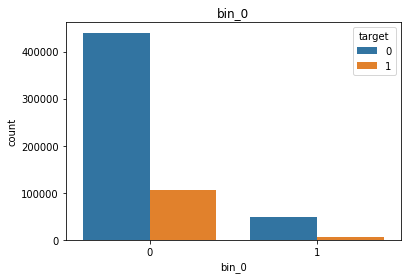

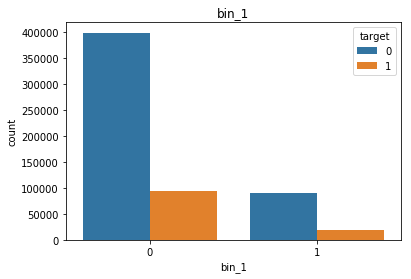

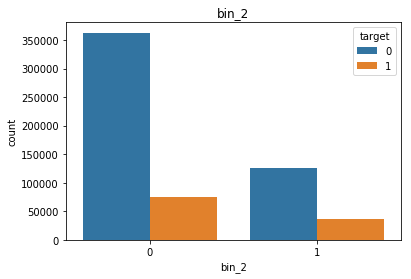

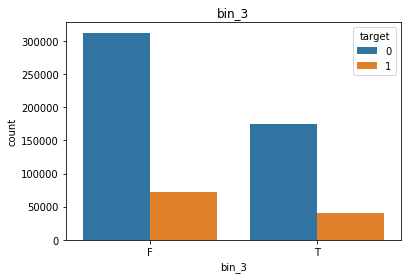

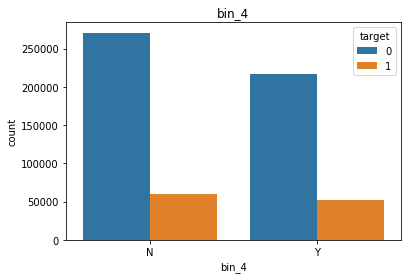

In [16]:
# Binary variable visualisation

for i in bin_cols:
    sns.countplot(x=i, hue="target", data=X_train)
    plt.title(i)
    plt.show()

In [17]:
# Bin_3 and Bin_4- We convert categorical into Binary values
X_train['bin_3']=X_train['bin_3'].apply(lambda x : 1 if 'F' else 'T')
X_train['bin_4']=X_train['bin_2'].apply(lambda x : 1 if 'N' else 'Y')

# Test set
X_test['bin_3']=X_test['bin_3'].apply(lambda x : 1 if 'F' else 'T')
X_test['bin_4']=X_test['bin_2'].apply(lambda x : 1 if 'N' else 'Y')



In [18]:
X_train[bin_cols].head()

,bin_0,bin_1,bin_2,bin_3,bin_4
0,0,0,0,1,1
1,1,1,0,1,1
2,0,1,0,1,1
3,0,0,0,1,1
4,0,0,0,1,1


Now Binary columns are ready for Modelling. Next is to encoding nominal and ordinary variables

In [19]:
ord_cols = [col for col in X_train if col.startswith('ord')]

for i in ord_cols:
    print([i],X_train[i].unique())

['ord_0'] [3.         1.         2.         1.94822352]
['ord_1'] ['Contributor' 'Grandmaster' 'Novice' 'Expert' 'Master']
['ord_2'] ['Hot' 'Warm' 'Freezing' 'Lava Hot' 'Cold' 'Boiling Hot']
['ord_3'] ['c' 'e' 'n' 'a' 'h' 'b' 'd' 'k' 'g' 'o' 'i' 'm' 'f' 'l' 'j']
['ord_4'] ['U' 'X' 'P' 'C' 'Q' 'R' 'Y' 'N' 'I' 'O' 'M' 'E' 'V' 'K' 'G' 'B' 'H' 'T'
 'W' 'A' 'F' 'D' 'S' 'J' 'L' 'Z']
['ord_5'] ['Pw' 'pE' 'eN' 'Fl' 'OZ' 'wa' 'rg' 'PS' 'mX' 'hG' 'xF' 'RV' 'Nh' 'dp'
 'SS' 'OM' 'Rv' 'HF' 'iS' 'HK' 'Ib' 'AW' 'mi' 'jf' 'Tz' 'ok' 'nS' 'Sz'
 'sf' 'fV' 'iv' 'US' 'dh' 'Io' 'RD' 'oI' 'DN' 'IS' 'oh' 'YJ' 'vq' 'us'
 'sY' 'th' 'Ey' 'AI' 'Mg' 'oU' 'Dj' 'TH' 'CN' 'aA' 'tT' 'Wr' 'TZ' 'mo'
 'rM' 'Pk' 'UV' 'RT' 'DT' 'Hk' 'Dn' 'nj' 'gL' 'cy' 'JT' 'XC' 'lA' 'TL'
 'zp' 'XM' 'AG' 'WW' 'GZ' 'MV' 'Bx' 'oJ' 'ze' 'Rj' 'LY' 'Iq' 'gc' 'LS'
 'hx' 'JQ' 'fO' 'vx' 'MX' 'ly' 'BX' 'Yr' 'XR' 'yE' 'Sk' 'aE' 'wU' 'rA'
 'Ji' 'qN' 'nn' 'kv' 'pB' 'sc' 'EC' 'kT' 'be' 'uQ' 'DI' 'hT' 'pl' 'tn'
 'xG' 'NT' 'fe' 'lS' 'Mq' 'Yi' 'BL' 'AU' '

In [20]:
nominal_cols = [col for col in X_train if col.startswith('nom')]

for i in nominal_cols:
    print([i],X_train[i].unique())

['nom_0'] ['Red' 'Blue' 'Green']
['nom_1'] ['Trapezoid' 'Star' 'Triangle' 'Circle' 'Polygon' 'Square']
['nom_2'] ['Hamster' 'Axolotl' 'Lion' 'Dog' 'Cat' 'Snake']
['nom_3'] ['Russia' 'India' 'Canada' 'Finland' 'Costa Rica' 'China']
['nom_4'] ['Bassoon' 'Theremin' 'Oboe' 'Piano']
['nom_5'] ['de4c57ee2' '2bb3c3e5c' 'b574c9841' ... 'b3ad70fcb' 'd6bb2181a'
 '30019ce8a']
['nom_6'] ['a64bc7ddf' '3a3a936e8' '708248125' ... '96c5df3d0' 'a93b49b8c'
 'd80c01ec8']
['nom_7'] ['598080a91' '1dddb8473' '5ddc9a726' '3a33ef960' 'bc9cc2a94' '8c30b9b0b'
 '1cba571fa' '81d67e1bb' '429114096' '56d35c774' '93360bbc9' '088aace2d'
 '12370b989' 'ba9faf5b1' 'fdebf0648' '90a2cba07' '5de0b3fa7' 'e5b00a0e0'
 '1d2ee04de' '4ae48e857' '69403e18c' 'cf84cbe77' 'fba315672' '6e29d3f38'
 'c3ad85934' '6b1d5295a' 'a306b1f4e' '432ee0053' '9a9e7bf71' 'b2d0012ea'
 '9d52e9089' 'bb63fcef7' 'dd4d69481' 'b0ab8b134' '2c649f60e' '42f607baa'
 '7e1c4cff1' '482233c7f' '7f31f4d2b' '11409e362' '3f63ecb96' '057ab40ea'
 '4b13d99ca' '69238b54

**Categorical Encoding**

We have to do encoding for Categorical variables. For Nominal , it is better to do by One Hot Encoding

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null int64
bin_0     600000 non-null int64
bin_1     600000 non-null int64
bin_2     600000 non-null int64
bin_3     600000 non-null int64
bin_4     600000 non-null int64
nom_0     600000 non-null object
nom_1     600000 non-null object
nom_2     600000 non-null object
nom_3     600000 non-null object
nom_4     600000 non-null object
nom_5     600000 non-null object
nom_6     600000 non-null object
nom_7     600000 non-null object
nom_8     600000 non-null object
nom_9     600000 non-null object
ord_0     600000 non-null float64
ord_1     600000 non-null object
ord_2     600000 non-null object
ord_3     600000 non-null object
ord_4     600000 non-null object
ord_5     600000 non-null object
day       600000 non-null float64
month     600000 non-null float64
target    600000 non-null int64
dtypes: float64(3), int64(7), object(15)
memory usage: 114.4+ MB


In [22]:
cat_cols_encoding= X_train.select_dtypes(include=['object']).columns.to_list()
X_test[cat_cols_encoding].head()


,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,Blue,Polygon,Axolotl,Finland,Piano,52f6dd16c,147d704e4,8d857a0a1,ca9ad1d4b,fced9e114,Novice,Boiling Hot,f,U,oU
1,Red,Circle,Lion,Russia,Bassoon,691ebeae8,8653dcc2e,67a8d4ebb,060a21580,7ca8775da,Novice,Cold,n,N,Fl
2,Blue,Circle,Axolotl,Russia,Theremin,81f792c16,6cdda499e,69403e18c,165e81a00,5940334c9,Expert,Warm,i,N,DN
3,Red,Polygon,Axolotl,Costa Rica,Bassoon,c9134205b,acbca4827,cb681246b,77d41330d,6fbdeefc8,Expert,Hot,m,B,AG
4,Red,Circle,Hamster,Finland,Theremin,f0f100f57,6f800b9af,cd9feb5c6,2218d9dfe,2a27c8fde,Contributor,Lava Hot,o,J,DT


In [23]:
# X_train[cat_cols_encoding].head()
X_test.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [24]:
# we will do Random Forest Method to Identify the target. for that we will do Label encoding.


cat_cols_encoding= X_train.select_dtypes(include=['object']).columns.to_list()

from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

for col in cat_cols_encoding:
    X_train[c]= label_encoder.fit_transform(X_train[c])
 



In [25]:
for c in cat_cols_encoding:
    X_test[c] = label_encoder.transform(X_test[c])

ValueError: y contains previously unseen labels: 'Blue'